In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#import all the requirements Files
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
#Testing the Train CSV file 
df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [5]:
df_train.shape

(42000, 785)

In [6]:
df_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
X_train_orig = df_train.drop('label', axis=1).to_numpy()
X_train_orig

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
y_train_orig = df_train.label.to_numpy()
y_train_orig

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
#Testing the Test CSV files 
df_test = pd.read_csv('../input/digit-recognizer/test.csv')
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test_orig = df_test.to_numpy()
X_test_orig

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
X_train = X_train_orig.astype('float32')/255
y_train = y_train_orig.astype('float32')
X_test = X_test_orig.astype('float32')/255

In [14]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [15]:
y_train = tf.one_hot(y_train, 10)
y_train

<tf.Tensor: shape=(42000, 10), dtype=float32, numpy=
array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [16]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)

X_train shape:  (42000, 28, 28, 1)
X_test shape:  (28000, 28, 28, 1)
y_train shape:  (42000, 10)


In [17]:
input_shape = (28, 28, 1)

In [21]:
CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same',input_shape=input_shape),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),    
])

In [22]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)       

In [24]:
cnn_history = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 153s 116ms/step - loss: 0.3818 - accuracy: 0.8822
Epoch 2/10
1313/1313 [==============================] - 152s 116ms/step - loss: 0.0622 - accuracy: 0.9801
Epoch 3/10
1313/1313 [==============================] - 152s 116ms/step - loss: 0.0544 - accuracy: 0.9830
Epoch 4/10
1313/1313 [==============================] - 152s 115ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 5/10
1313/1313 [==============================] - 151s 115ms/step - loss: 0.0375 - accuracy: 0.9891
Epoch 6/10
1313/1313 [==============================] - 151s 115ms/step - loss: 0.0292 - accuracy: 0.9907
Epoch 7/10
1313/1313 [==============================] - 151s 115ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 8/10
1313/1313 [==============================] - 151s 115ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 9/10
1313/1313 [==============================] - 151s 115ms/step - loss: 0.0205 - accuracy: 0.9935
Epoch 10/10
1313/1313 [=======================

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

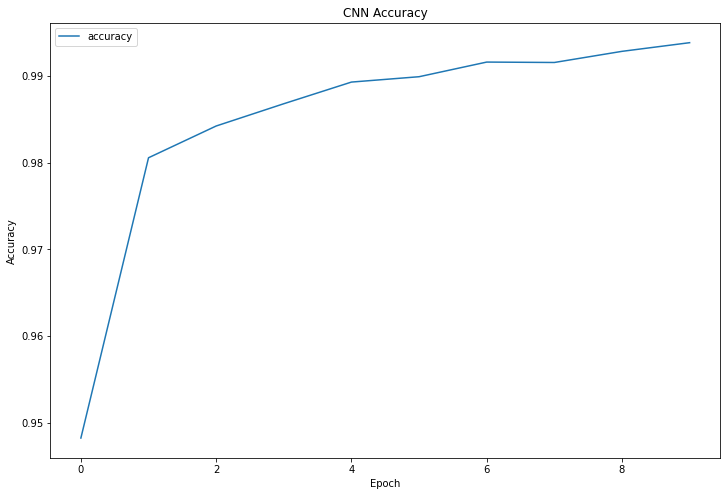

In [25]:
df_loss_acc = pd.DataFrame(cnn_history.history)
df_acc = df_loss_acc[['accuracy']]
df_acc.plot(title='CNN Accuracy', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Accuracy')

In [26]:
df_loss = df_loss_acc[['loss']]

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

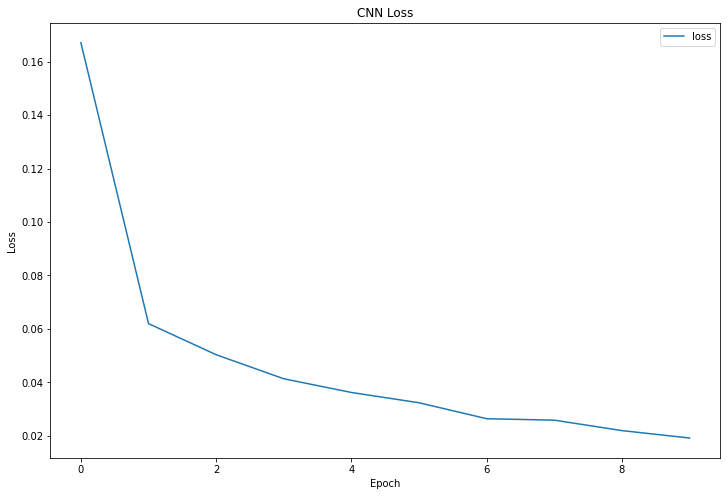

In [27]:
df_loss.plot(title='CNN Loss', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Loss')

In [28]:
predictions = cnn.predict(X_test)

In [31]:
results = np.argmax(predictions,axis=1)
results = pd.Series(results, name="Label")
list=[]
[list.append(i) for i in range(1,28001)]
ImageID = pd.Series(list, name="ImageID").astype("int32")
submission = pd.concat([ImageID,results],axis = 1)

submission.to_csv("BasedCNN Digit-Recoginer.csv", index=False)